In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Parameters 

L        = 50.0                
U_stream = 50.0         
Reynold  = 1e4         
kin_vis  = (U_stream * L) / Reynold  

# Grid Parameters

Nx       = 100        
Ny       = 50              
x        = np.linspace(0, L, Nx) 
y_max    = 1
y        = np.linspace(0, y_max, Ny)        
dy       = y_max / (Ny - 1)  
dx       = (dy ** 2) / (2 * kin_vis) 

# Initializing velocity arrays

u        = np.zeros((Nx, Ny))  
v        = np.zeros((Nx, Ny))  
u_new    = np.zeros((Nx, Ny))

# Boundary Conditions for the flow domain


u[0,:]   = U_stream
u[:, -1] = 0
v[:, 0]  = 0 
v[0, :]  = 0

In [41]:
def contour(x, y, u):
    X, Y = np.meshgrid(x, y)
    plt.figure(figsize=(10, 7))
    plt.contourf(X, Y, u.T, levels=50, cmap='viridis')
    plt.colorbar(label='u')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(0, 0.5)
    plt.title('Contour Plot')
    plt.show()

In [42]:
# Implicit scheme loop
for i in range(1, Nx):
    u_last = u[i-1, :] 

    # Set up the tridiagonal matrix for implicit y-momentum calculation
    A = np.zeros((Ny, Ny))
    b = np.zeros(Ny)

    # Boundary conditions (top and bottom)
    A[0, 0]   = 1
    A[-1, -1] = 1
    b[0]      = U_stream
    b[-1]     = 0

    for j in range(1, Ny-1):
        # Setting up the implicit finite difference system
        A[j, j-1] = kin_vis / dy**2
        A[j, j]   = -(2 * kin_vis / dy**2 + 1/dx)
        A[j, j+1] = kin_vis / dy**2
        
        # Right-hand side vector
        b[j] = -v[i, j] * (u_last[j+1] - u_last[j-1]) / (2 * dy)

    # Solve the tridiagonal system for u_new at this x position
    u_new[i, :] = np.linalg.solve(A, b)

    # Calculate v velocity using the new u values
    for j in range(1, Ny-1):
        v[i, j] = v[i, j-1] - (dy / (2 * dx)) * (u[i-1, j] - u_last[j])

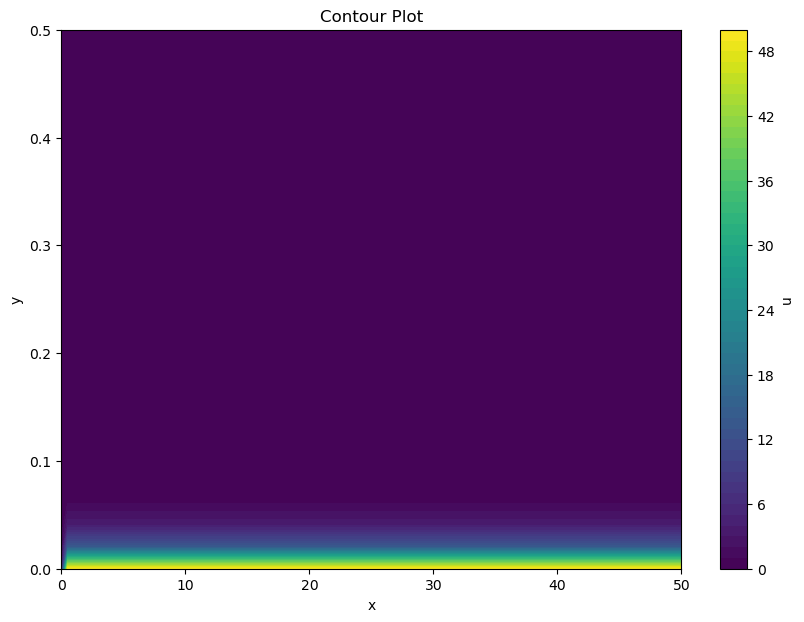

In [43]:
# Plot the final x-velocity contour
contour(x, y, u_new)


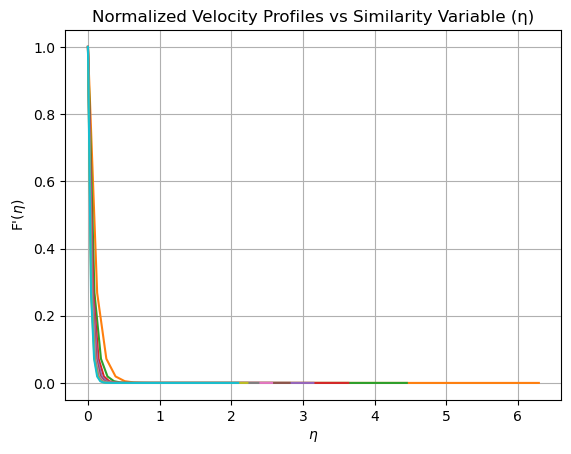

In [35]:
# Similarity variables for velocity profile
F_prime = np.zeros((Nx, Ny))  
eta = np.zeros((Nx, Ny))  

for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        eta[i, j]     = yj * np.sqrt(U_stream / (kin_vis * xi)) if xi != 0 else 0  
        F_prime[i, j] = u_new[i, j] / U_stream  

plt.figure()

for i in range(0, Nx, Nx // 10):
    plt.plot(eta[i, :], F_prime[i, :], label=f'x = {x[i]:.2f} m')

plt.xlabel(r'$\eta$')
plt.ylabel("F'($\eta$)")
plt.title("Normalized Velocity Profiles vs Similarity Variable (η)")
plt.grid(True)
plt.show()